<a href="https://colab.research.google.com/github/Ketan-Kapse/PneumoniaTypeClassifier/blob/main/Bact_pneu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [177]:
%cd /content/drive/My\ Drive/Bacterial_pneumonia


/content/drive/My Drive/Bacterial_pneumonia


In [188]:
from keras.layers import *
from keras.models import *
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [189]:
image_size = [224, 224]

train = 'train'
valid = 'test'

In [190]:
res = ResNet50(
    input_shape=image_size + [3],
    weights='imagenet',
    include_top=False)

In [191]:
for layer in res.layers:
    layer.trainable = False

In [192]:
folders = glob('train/*')

In [203]:
model = Sequential()
model.add(res)
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.add(Flatten())
model.add(Dense(len(folders), activation='softmax'))


In [ ]:
model.summary()

In [204]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [205]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range=15)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [206]:

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3870 images belonging to 2 classes.


In [207]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )

Found 356 images belonging to 2 classes.


In [209]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
121/121 [==============================] - 92s 762ms/step - loss: 0.4716 - accuracy: 0.7664 - val_loss: 0.4769 - val_accuracy: 0.8006
Epoch 2/25
121/121 [==============================] - 92s 760ms/step - loss: 0.3772 - accuracy: 0.8328 - val_loss: 0.4230 - val_accuracy: 0.7669
Epoch 3/25
121/121 [==============================] - 91s 752ms/step - loss: 0.3236 - accuracy: 0.8612 - val_loss: 0.3601 - val_accuracy: 0.8371
Epoch 4/25
121/121 [==============================] - 90s 746ms/step - loss: 0.2979 - accuracy: 0.8752 - val_loss: 0.3220 - val_accuracy: 0.8567
Epoch 5/25
121/121 [==============================] - 89s 739ms/step - loss: 0.2785 - accuracy: 0.8881 - val_loss: 0.2842 - val_accuracy: 0.8961
Epoch 6/25
121/121 [==============================] - 89s 736ms/step - loss: 0.2654 - accuracy: 0.8941 - val_loss: 0.2678 - val_accuracy: 0.8989
Epoch 7/25
121/121 [==============================] - 88s 728ms/step - loss: 0.2534 - accuracy: 0.8956 - val_loss: 0.2665 - val_ac

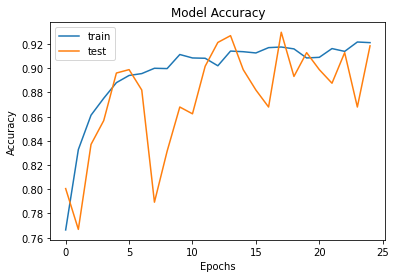

In [210]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

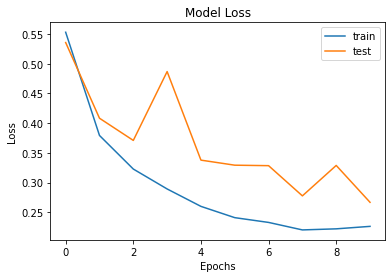

In [211]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [212]:
res.trainable=True

In [213]:
tune_at=149
for layer in res.layers[:tune_at]:
  layer.trainable =  False
len(res.layers)

175

In [225]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
for i in range (len(res.layers)):
    print (i,res.layers[i])

In [227]:
for layer in res.layers[159:]:
    layer.trainable=True
for layer in res.layers[0:159]:
  layer.trainable = False

In [ ]:
tune_epochs = 25
total_epochs = tune_epochs + 25
history_fine = model.fit(training_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_set)

Epoch 25/50
121/121 [==============================] - 89s 708ms/step - loss: 0.6510 - accuracy: 0.6468 - val_loss: 0.6281 - val_accuracy: 0.6798
Epoch 26/50
103/121 [========================>.....] - ETA: 12s - loss: 0.6477 - accuracy: 0.6510

In [ ]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('Model Loss After Finetuning')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()